### Introduction
This file contains the steps from reading the raw data through   outliers elimination to feature selection for further analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading data

bankFull = pd.read_csv("bank-full.csv", sep=";") 
bankFull.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7646,37,management,single,secondary,no,3167,yes,no,unknown,30,may,197,1,-1,0,unknown,no
36813,56,management,married,primary,no,31,yes,no,cellular,12,may,215,2,-1,0,unknown,no
41863,40,technician,married,secondary,no,2338,no,no,cellular,16,oct,717,2,-1,0,unknown,yes
4985,31,admin.,single,tertiary,no,1583,yes,no,unknown,21,may,207,1,-1,0,unknown,no
30077,30,admin.,married,secondary,yes,23,no,yes,cellular,4,feb,149,2,-1,0,unknown,no


# Exploratory Data Analysis, Part 1

As we can see data contains both categorical and numerical features and there is no missing values. Detailed description of data contains file "bank-names.txt". 

The output variable is "y" and describe clients who accepted the offer of a bank deposit.


In [3]:
bankFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Numerical features

In [4]:
#selecting numerical features 
numeric_columns = [column for column in bankFull.columns if bankFull[column].dtype == "int64" ]
numeric_columns
bankFull.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Histogram plots

<Figure size 432x288 with 0 Axes>

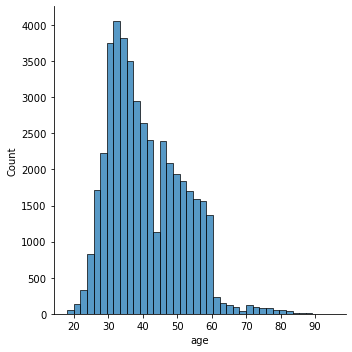

<Figure size 432x288 with 0 Axes>

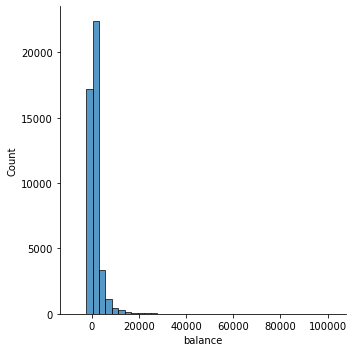

<Figure size 432x288 with 0 Axes>

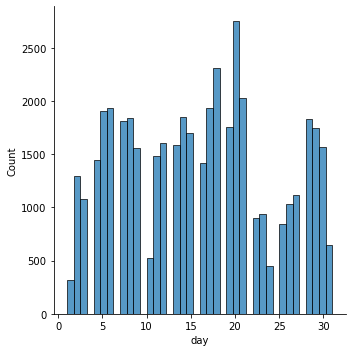

<Figure size 432x288 with 0 Axes>

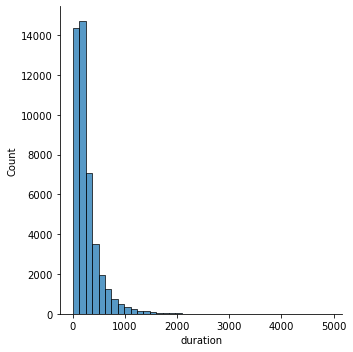

<Figure size 432x288 with 0 Axes>

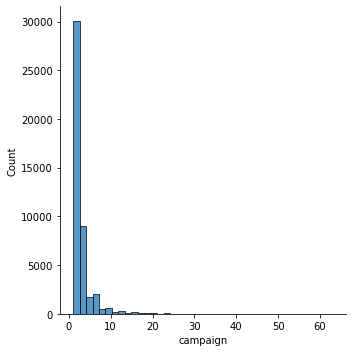

<Figure size 432x288 with 0 Axes>

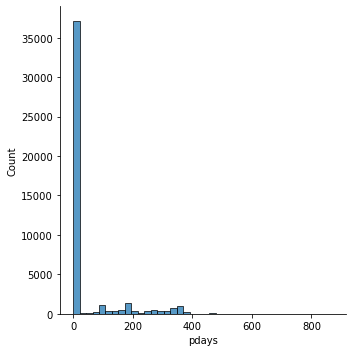

<Figure size 432x288 with 0 Axes>

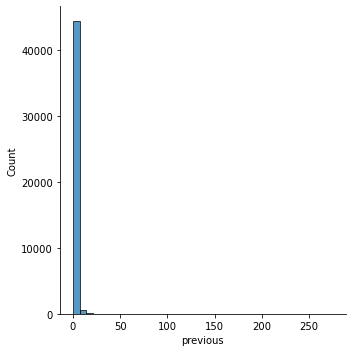

In [5]:
for feature in numeric_columns:
    plt.figure()
    sns.displot(bankFull[feature], kde= False,bins = 40);

### Outlieres removing

Interquartile Range Rule was used there.

Interquartile ($iqr$) is the difference between $q_3$ and $q_1$. We remove the data lower than $q_1 - 1.5* iqr$ and larger than $q_3 + 1.5* iqr$.

In [6]:
def low_high_boundary(data):
    """
    Calculating low and high boundary to eliminate the outlieres
    """
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)
    iqr = q3 - q1
    return  q1 - 1.5 * iqr, q3 + 1.5 * iqr 
    

In [7]:
#outliers boudary report 
frame = pd.DataFrame()
for name in numeric_columns:
    a, b = low_high_boundary(bankFull[name])
    frame = frame.append({
        "feature name" : name,
        "q1":bankFull[name].quantile(0.25),
        "q3":bankFull[name].quantile(0.75),
        "low_boundery" : a,
        "high_boundary" : b,
        "num_low_outLieres" : (bankFull[name] < a).sum(),
        "num_high_outLieres" : (bankFull[name] > b).sum()
    },ignore_index = True)

print(frame)


  feature name  high_boundary  low_boundery  num_high_outLieres  \
0          age           70.5          10.5               487.0   
1      balance         3462.0       -1962.0              4712.0   
2          day           40.5         -11.5                 0.0   
3     duration          643.0        -221.0              3235.0   
4     campaign            6.0          -2.0              3064.0   
5        pdays           -1.0          -1.0              8257.0   
6     previous            0.0           0.0              8257.0   

   num_low_outLieres     q1      q3  
0                0.0   33.0    48.0  
1               17.0   72.0  1428.0  
2                0.0    8.0    21.0  
3                0.0  103.0   319.0  
4                0.0    1.0     3.0  
5                0.0   -1.0    -1.0  
6                0.0    0.0     0.0  


As we can see for 'pdays' and 'previous' this method do not work since $q_3 = q_1$. Above we listed counted values of 'previous' and histogram without value 0. The same with 'pdays' (there we have removed value -1). it seems that most of our data does not contain the information about previous campaigns. So we repeat Interquartile Range only for  nonzero values.

In [8]:
bankFull["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [9]:
#temp_prev is data for 'previous' != 0
temp_prev = bankFull[bankFull["previous"] != 0]["previous"]

In [11]:
bankFull["pdays"].value_counts()
#temp_pdays is data for 'pdays' != -1
temp_pdays = bankFull[bankFull["pdays"] != -1]["pdays"]

New low and high boundaries are calculated for those two features:

In [12]:
a_d,b_d = low_high_boundary(temp_pdays)
a_p,b_p = low_high_boundary(temp_prev)
print(f"Pdays low: {a_d}\t pdays high: {b_d}")
print(f"Previous low: {a_p}\t Previous high: {b_p}")

Pdays low: -158.0	 pdays high: 618.0
Previous low: -3.5	 Previous high: 8.5


#### Removing values
As the result we revove standard Interqartial values for all features exept two ('pdays' and ' previous') where we use above values.

In [13]:
bankFull = bankFull[(bankFull['pdays'] < b_d) & (bankFull['pdays'] > a_d) ]
bankFull = bankFull[(bankFull['previous'] < b_p) & (bankFull['previous'] > a_p) ]
for col in ['age', 'balance', 'day', 'duration', 'campaign']:
    #TODO check less restrictive method
    a,b = low_high_boundary(bankFull[col])
    bankFull = bankFull[(bankFull[col] < b) & (bankFull[col] > a) ]

In [14]:
bankFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33166 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33166 non-null  int64 
 1   job        33166 non-null  object
 2   marital    33166 non-null  object
 3   education  33166 non-null  object
 4   default    33166 non-null  object
 5   balance    33166 non-null  int64 
 6   housing    33166 non-null  object
 7   loan       33166 non-null  object
 8   contact    33166 non-null  object
 9   day        33166 non-null  int64 
 10  month      33166 non-null  object
 11  duration   33166 non-null  int64 
 12  campaign   33166 non-null  int64 
 13  pdays      33166 non-null  int64 
 14  previous   33166 non-null  int64 
 15  poutcome   33166 non-null  object
 16  y          33166 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.6+ MB


## Categorical features

Below we can see analisis for categorical features - list of unique values, staistic and count plots

job
blue-collar      7368
management       6632
technician       5615
admin.           4028
services         3201
retired          1343
self-employed    1126
entrepreneur     1094
unemployed        940
housemaid         895
student           737
unknown           187
Name: job, dtype: int64
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
married     19714
single       9581
divorced     3871
Name: marital, dtype: int64
['married' 'single' 'divorced']
education
secondary    17573
tertiary      9359
primary       4933
unknown       1301
Name: education, dtype: int64
['tertiary' 'secondary' 'unknown' 'primary']
default
no     32515
yes      651
Name: default, dtype: int64
['no' 'yes']
housing
yes    19018
no     14148
Name: housing, dtype: int64
['yes' 'no']
loan
no     27492
yes     5674
Name: loan, dtype: int64
['no' 'yes']
contact
cellular     21417
unknown       9978
telephone 

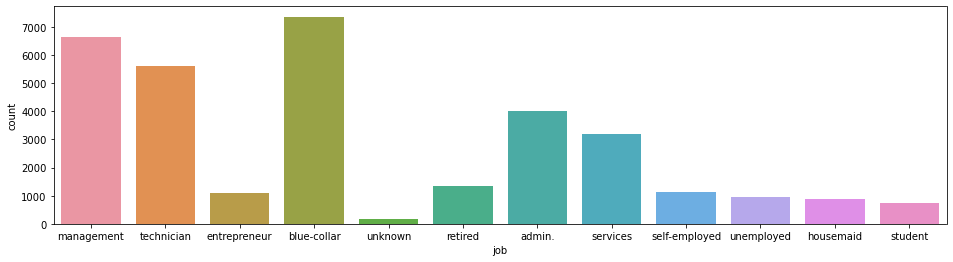

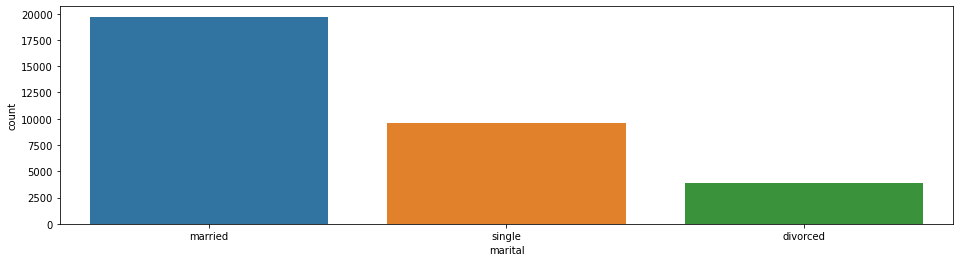

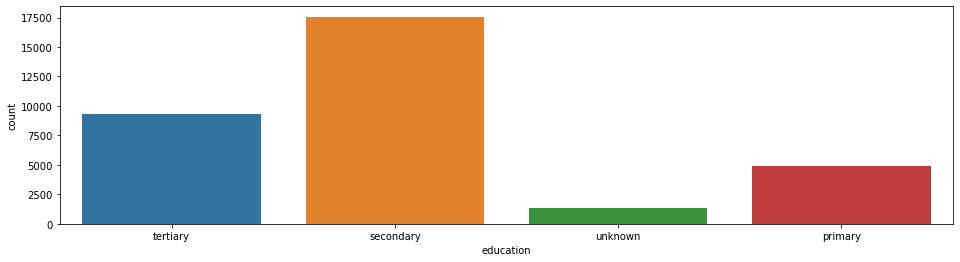

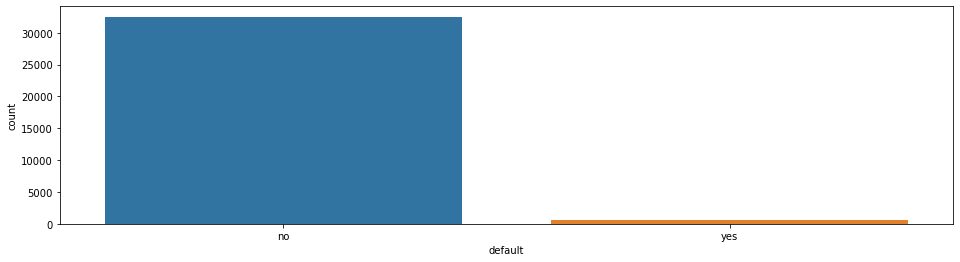

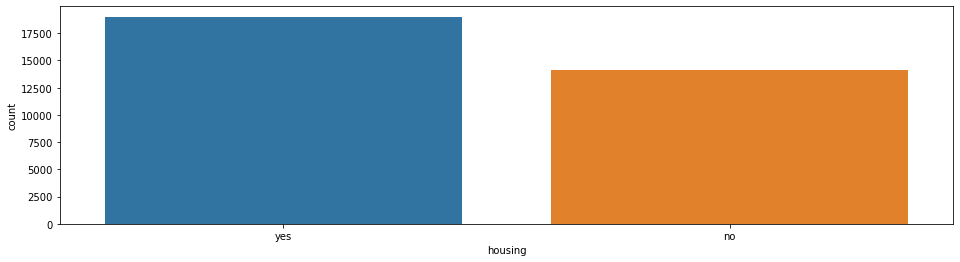

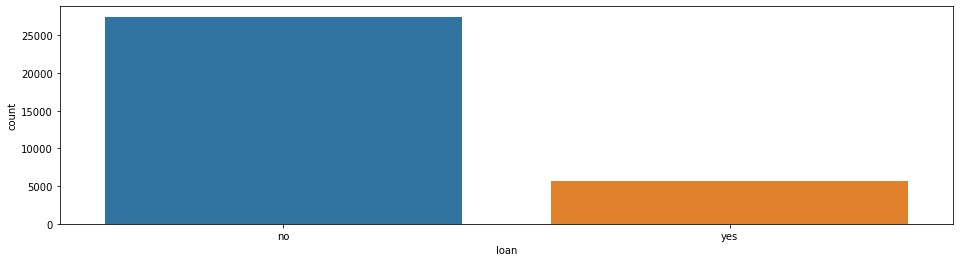

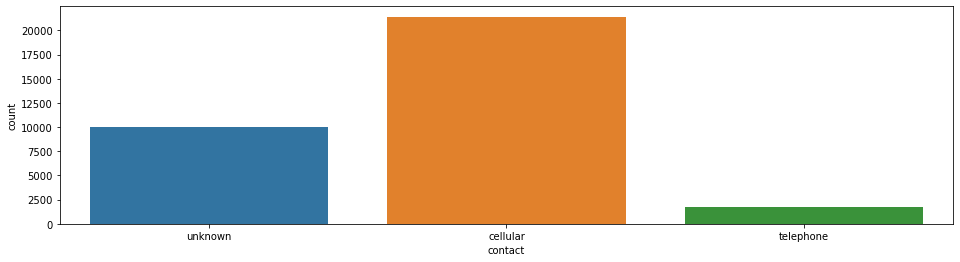

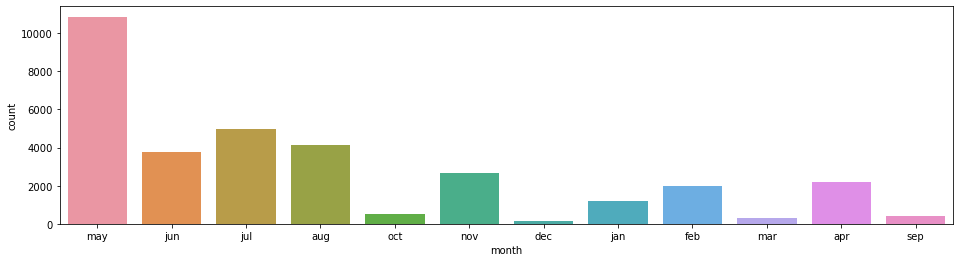

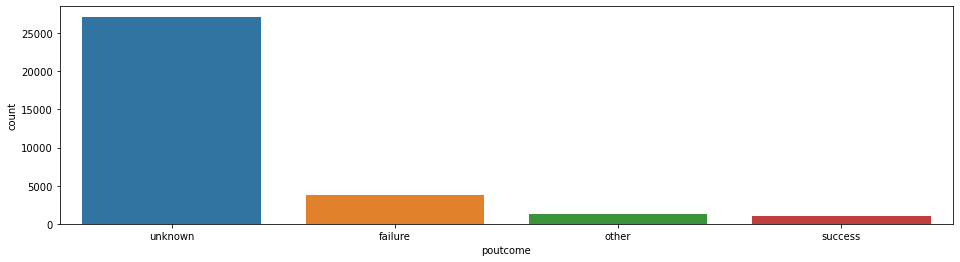

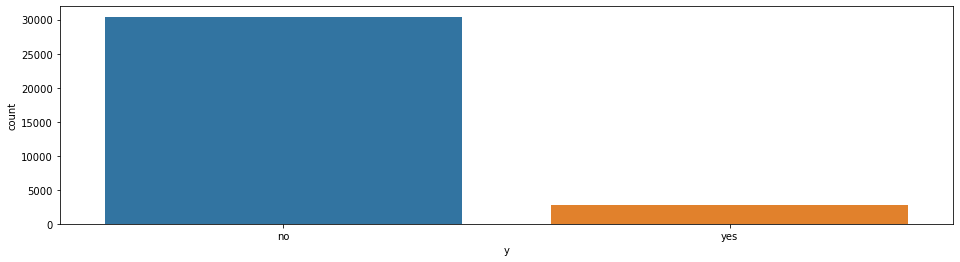

In [17]:
cat_columns = [name for name in bankFull.columns if bankFull[name].dtype == "object"]
for col in cat_columns:
        print(col)
        print(bankFull[col].value_counts())
        print("==============================")
        print(bankFull[col].unique())
        plt.figure(figsize=(16,4))
        sns.countplot(x = col, data=bankFull)


### Removing columns - feature selection

It look like we have data mainly from months from May till August. In first step I do not take this information into further analysis. I do not know why it is so. In the forst step I did not take this into account for simplicity.

In [16]:
to_remove = ["day", "month"]
bankFull = bankFull.drop(to_remove, axis=1)

In [17]:
bankFull = bankFull.reset_index()
bankFull = bankFull.iloc[:,1:]
bankFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33166 entries, 0 to 33165
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33166 non-null  int64 
 1   job        33166 non-null  object
 2   marital    33166 non-null  object
 3   education  33166 non-null  object
 4   default    33166 non-null  object
 5   balance    33166 non-null  int64 
 6   housing    33166 non-null  object
 7   loan       33166 non-null  object
 8   contact    33166 non-null  object
 9   duration   33166 non-null  int64 
 10  campaign   33166 non-null  int64 
 11  pdays      33166 non-null  int64 
 12  previous   33166 non-null  int64 
 13  poutcome   33166 non-null  object
 14  y          33166 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


#### Saving Data

In [18]:
#saving data in pickle form
bankFull.to_pickle("EDA1.pkl")
#bankFull.to_csv("EDA1.csv")